In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data',one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [5]:
X_train,Y_train=mnist.train.images,mnist.train.labels
X_val,Y_val= mnist.validation.images, mnist.validation.labels

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import optimizers

In [20]:
no_hl1=200
no_hl2=100
no_hl3=60
no_hl4=30
no_fl=10

model= Sequential()
model.add(Dense(no_hl1,input_shape=(784,),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(no_hl2,input_shape=(no_hl1,),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(no_hl3,input_shape=(no_hl2,),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(no_hl4,input_shape=(no_hl3,),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(no_fl))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 60)                6060      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 30)                1830      
__________

In [21]:
network_history=model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=60, 
          batch_size=100, verbose=True)

Train on 55000 samples, validate on 5000 samples
Epoch 1/60
55000/55000 [==============================] - 2s - loss: 0.9725 - acc: 0.6752 - val_loss: 0.2497 - val_acc: 0.9298
Epoch 2/60
55000/55000 [==============================] - 1s - loss: 0.3665 - acc: 0.9005 - val_loss: 0.1667 - val_acc: 0.9538
Epoch 3/60
55000/55000 [==============================] - 1s - loss: 0.2699 - acc: 0.9291 - val_loss: 0.1290 - val_acc: 0.9672
Epoch 4/60
55000/55000 [==============================] - 2s - loss: 0.2257 - acc: 0.9410 - val_loss: 0.1281 - val_acc: 0.9678
Epoch 5/60
55000/55000 [==============================] - 2s - loss: 0.1976 - acc: 0.9496 - val_loss: 0.1206 - val_acc: 0.9716
Epoch 6/60
55000/55000 [==============================] - 2s - loss: 0.1788 - acc: 0.9548 - val_loss: 0.1045 - val_acc: 0.9720
Epoch 7/60
55000/55000 [==============================] - 1s - loss: 0.1580 - acc: 0.9595 - val_loss: 0.1029 - val_acc: 0.9738
Epoch 8/60
55000/55000 [==============================] - 1s -

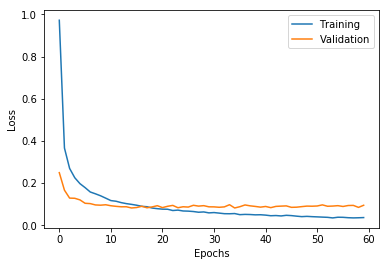

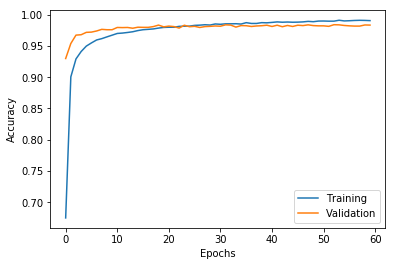

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)